In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from miniscope.imagingIO import loopMice, loadData, loadBeh, getBeh
from miniscope.analysis import dffCalc, filtData, smoothData
from miniscope.events import getEvents
from miniscope.trials import markTrials
from miniscope.bouts import getBouts, getBoutDur, getBouts_
from miniscope.statistics import stdCalc, getBoutMeans, getBoutMeans_, baselineBouts, getStats
from miniscope.plotter import plotMean, plotHeat, plotTrials

In [2]:
# Start gathering the data from FR1 experiment
# Mouse IDs and dataset IDs
mice = [(8404, 6), (8857, 3), (8864, 1)]
# Parameters
# Behavior type
behType = 'FR1'
# Imaging frame rate
fs = 0.05
# Which trials to include
trials=[1,12]
# Do you want to save?
save = False

In [3]:
# Get file paths for imaging data and behavior timestamps
fileList = loopMice(mice, behType)

# Load the imaging data
dataList = loadData(mice, behType)

# Load the behaviour timestamps
eventList = getBeh(mice, fileList['Behaviour'], behType)

In [4]:
# FIlter and dFF
filtList = filtData(mice, dffCalc(mice, dataList, lowest=False), cutoff=3.0, order=6)
dFFList = smoothData(mice, filtList, window=5)

In [5]:
from scipy.stats import sem
Start = getEvents(mice, eventList, 'Eat_Start', trials)
End = getEvents(mice, eventList, 'Eat_End', trials)
boutDuration = End - Start
"Mean bout duration: ", boutDuration.values.mean(), "sec." "Sem: ", sem(boutDuration.values, axis=None), "Std: ", np.std(boutDuration.values, axis=None)

('Mean bout duration: ',
 8.2775555555555691,
 'sec.Sem: ',
 0.41408818063353187,
 'Std: ',
 2.4497787138665399)

In [6]:
# Do you want to save the figs and stats?
save = False

In [7]:
# First half


3  mice were loaded.

Traces were not baselined.


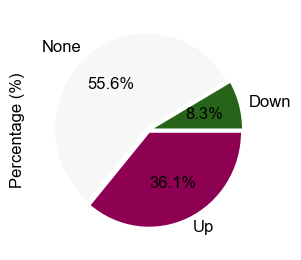

In [8]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout

# Eating bout first half
Start = getEvents(mice, eventList, 'Eat_Start', trials)
End = getEvents(mice, eventList, 'Eat_End', trials)
eventStart = Start
eventEnd = Start+((End-Start)/2)
baseEvent = Start
# Baseline equal to the event duration
base = Start-End

boutsDatafirst =  getBouts_(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
boutMeansFR1first = getBoutMeans_(mice, boutsDatafirst, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1first, percFR1first] = getStats(boutMeansFR1first, choice='Ranksum', parameter='Auc', p_val=0.05)

plt.style.use('classic')
# Set the font dictionaries (for plot title and axis titles)
font = {'sans-serif':'Arial', 'weight':'normal', 'size':12}
plt.rc('font', **font)

line = 1.5

fig = plt.figure(figsize=(3,3), facecolor="w", dpi= 150)
ax = plt.subplot(111)
percFR1first.T.plot.pie(ax=ax, y='Percentage (%)', autopct='%1.1f%%', explode=[.02,.02,.02], startangle=0, fontsize=12, legend=False, cmap=plt.cm.PiYG_r)
wedges = [patch for patch in ax.patches if isinstance(patch, mpatches.Wedge)]
for w in wedges:
    w.set_linewidth(line)
    w.set_edgecolor('w')    
    
if save:
    fig.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\updownallaround_eat_bout_first_half.svg")
    statsFR1first.to_csv("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\first_half_stats.csv")

In [9]:
# Second half


3  mice were loaded.

Traces were not baselined.


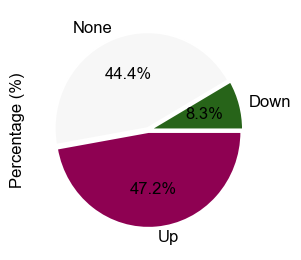

In [10]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout

# Eating bout second half
Start = getEvents(mice, eventList, 'Eat_Start', trials)
End = getEvents(mice, eventList, 'Eat_End', trials)
eventStart = End-((End-Start)/2)
eventEnd = End
baseEvent = Start
# Baseline equal to the event duration
base = Start-End

boutsDatasecond =  getBouts_(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
boutMeansFR1second = getBoutMeans_(mice, boutsDatasecond, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1second, percFR1second] = getStats(boutMeansFR1second, choice='Ranksum', parameter='Auc', p_val=0.05)

plt.style.use('classic')
# Set the font dictionaries (for plot title and axis titles)
font = {'sans-serif':'Arial', 'weight':'normal', 'size':12}
plt.rc('font', **font)

line = 1.5

fig = plt.figure(figsize=(3,3), facecolor="w", dpi= 150)
ax = plt.subplot(111)
percFR1second.T.plot.pie(ax=ax, y='Percentage (%)', autopct='%1.1f%%', explode=[.02,.02,.02], startangle=0, fontsize=12, legend=False, cmap=plt.cm.PiYG_r)
wedges = [patch for patch in ax.patches if isinstance(patch, mpatches.Wedge)]
for w in wedges:
    w.set_linewidth(line)
    w.set_edgecolor('w')

if save:
    fig.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\updownallaround_eat_bout_second_half.svg")
    statsFR1second.to_csv("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\second_half_stats.csv")

In [11]:
# Whole bout


3  mice were loaded.

Traces were not baselined.


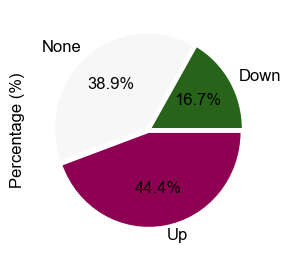

In [12]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout

# Eating bout
Start = getEvents(mice, eventList, 'Eat_Start', trials)
End = getEvents(mice, eventList, 'Eat_End', trials)
eventStart = Start
eventEnd = End
baseEvent = Start
# Baseline equal to the event duration
base = Start-End

boutsDatawhole =  getBouts_(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
#boutsData =  getBouts(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
boutMeansFR1whole = getBoutMeans_(mice, boutsDatawhole, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1whole, percFR1whole] = getStats(boutMeansFR1whole, choice='Ranksum', parameter='Auc', p_val=0.05)

plt.style.use('classic')
# Set the font dictionaries (for plot title and axis titles)
font = {'sans-serif':'Arial', 'weight':'normal', 'size':12}
plt.rc('font', **font)

line = 1.5

fig = plt.figure(figsize=(3,3), facecolor="w", dpi= 150)
ax = plt.subplot(111)
percFR1whole.T.plot.pie(ax=ax, y='Percentage (%)', autopct='%1.1f%%', explode=[.02,.02,.02], startangle=0, fontsize=12, legend=False, cmap=plt.cm.PiYG_r)
wedges = [patch for patch in ax.patches if isinstance(patch, mpatches.Wedge)]
for w in wedges:
    w.set_linewidth(line)
    w.set_edgecolor('w')
    
if save:
    fig.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\updownallaround_eat_bout_whole.svg")
    statsFR1whole.to_csv("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\whole_bout_stats.csv")

In [11]:
statsFR1whole.to_pickle("C:\\Users\\hakan\\Documents\\statsFR1whole.pkl")